In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [3]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
df_pfe = web.DataReader('PFE', 'yahoo', start, end) 
pfe= df_pfe
pfe=pfe.reset_index()
pfe['Date'] = pd.to_datetime(pfe['Date'])

# corresponding csv file is saved in an ouput directory 
df_pfe.to_csv('pfe_new_l.csv')
pfe

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999
...,...,...,...,...,...,...,...
1505,2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619
1506,2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777
1507,2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673
1508,2019-12-30,37.400379,36.897533,37.286530,36.916508,11554264.0,35.085968


In [5]:
df_pfe

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529
2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180
2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004
2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232
2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999
...,...,...,...,...,...,...
2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619
2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777
2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [18]:
df_fama3=pd.read_csv("F-F_Research_Data_Factors_daily.csv",skiprows=4)

In [19]:
df_fama3.tail()

,Date,Mkt-RF,SMB,HML,RF
24929,20210222,-1.12,-0.09,3.14,0.0
24930,20210223,-0.15,-1.28,0.90,0.0
24931,20210224,1.15,1.20,1.34,0.0
24932,20210225,-2.73,-1.12,0.87,0.0
24933,20210226,-0.28,0.72,-1.56,0.0


In [20]:
df_fama3.reset_index(drop = True, inplace= True)

In [21]:
df_fama3 = df_fama3[(df_fama3.Date > 20140101) & (df_fama3.Date < 20191231)]

In [22]:
df_fama3

,Date,Mkt-RF,SMB,HML,RF
23133,20140102,-0.88,-0.28,0.16,0.000
23134,20140103,0.03,0.37,0.04,0.000
23135,20140106,-0.34,-0.58,0.28,0.000
23136,20140107,0.68,0.39,-0.39,0.000
23137,20140108,0.04,0.01,-0.11,0.000
...,...,...,...,...,...
24637,20191223,0.10,0.20,-0.31,0.007
24638,20191224,0.01,0.37,-0.02,0.007
24639,20191226,0.48,-0.53,-0.02,0.007
24640,20191227,-0.10,-0.53,-0.07,0.007


In [23]:
df_fama3.shape

(1509, 5)

In [24]:
df_fama3.index = range(0, 1509, 1)

In [25]:
df_fama3

,Date,Mkt-RF,SMB,HML,RF
0,20140102,-0.88,-0.28,0.16,0.000
1,20140103,0.03,0.37,0.04,0.000
2,20140106,-0.34,-0.58,0.28,0.000
3,20140107,0.68,0.39,-0.39,0.000
4,20140108,0.04,0.01,-0.11,0.000
...,...,...,...,...,...
1504,20191223,0.10,0.20,-0.31,0.007
1505,20191224,0.01,0.37,-0.02,0.007
1506,20191226,0.48,-0.53,-0.02,0.007
1507,20191227,-0.10,-0.53,-0.07,0.007


In [44]:
df_pfe = pd.read_csv('pfe_new_l.csv')

In [45]:
df_pfe.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999


In [46]:
df_pfe.shape

(1510, 7)

In [47]:
df_pfe['MktRF'] = df_fama3['Mkt-RF']
df_pfe['SMB'] = df_fama3['SMB']
df_pfe['HML'] = df_fama3['HML']
df_pfe['RF'] = df_fama3['RF']

In [48]:
df_pfe

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529,-0.88,-0.28,0.16,0.000
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180,0.03,0.37,0.04,0.000
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,-0.34,-0.58,0.28,0.000
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,0.68,0.39,-0.39,0.000
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,0.04,0.01,-0.11,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619,0.01,0.37,-0.02,0.007
1506,2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777,0.48,-0.53,-0.02,0.007
1507,2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673,-0.10,-0.53,-0.07,0.007
1508,2019-12-30,37.400379,36.897533,37.286530,36.916508,11554264.0,35.085968,-0.57,0.17,0.59,0.007


In [49]:
df_pfe['Yest_Close']  = df_pfe['Adj Close'].shift(1)

#Yesterday's Close Price

In [50]:
df_pfe

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529,-0.88,-0.28,0.16,0.000,NaN
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180,0.03,0.37,0.04,0.000,22.159529
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,-0.34,-0.58,0.28,0.000,22.203180
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,0.68,0.39,-0.39,0.000,22.225004
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,0.04,0.01,-0.11,0.000,22.363232
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619,0.01,0.37,-0.02,0.007,35.455673
1506,2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777,0.48,-0.53,-0.02,0.007,35.428619
1507,2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673,-0.10,-0.53,-0.07,0.007,35.509777
1508,2019-12-30,37.400379,36.897533,37.286530,36.916508,11554264.0,35.085968,-0.57,0.17,0.59,0.007,35.455673


In [51]:
df_pfe['stock_return'] = (df_pfe['Adj Close']-df_pfe['Yest_Close'])/(df_pfe['Yest_Close'])

In [52]:
df_pfe

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529,-0.88,-0.28,0.16,0.000,NaN,NaN
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180,0.03,0.37,0.04,0.000,22.159529,0.001970
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,-0.34,-0.58,0.28,0.000,22.203180,0.000983
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,0.68,0.39,-0.39,0.000,22.225004,0.006219
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,0.04,0.01,-0.11,0.000,22.363232,0.006831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619,0.01,0.37,-0.02,0.007,35.455673,-0.000763
1506,2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777,0.48,-0.53,-0.02,0.007,35.428619,0.002291
1507,2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673,-0.10,-0.53,-0.07,0.007,35.509777,-0.001524
1508,2019-12-30,37.400379,36.897533,37.286530,36.916508,11554264.0,35.085968,-0.57,0.17,0.59,0.007,35.455673,-0.010427


In [53]:
temp = df_pfe.drop(df_pfe.index[[0,1]])

In [54]:
temp.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,-0.34,-0.58,0.28,0.0,22.203180,0.000983
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,0.68,0.39,-0.39,0.0,22.225004,0.006219
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,0.04,0.01,-0.11,0.0,22.363232,0.006831
5,2014-01-09,29.525618,29.041746,29.487665,29.345350,21692901.0,22.501451,0.02,0.20,-0.42,0.0,22.515999,-0.000646
6,2014-01-10,29.364326,28.937382,29.259962,29.117647,22890877.0,22.326855,0.27,0.55,-0.82,0.0,22.501451,-0.007759


In [55]:
df_pfe.reset_index(drop = True, inplace= True)

In [56]:
df_pfe

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529,-0.88,-0.28,0.16,0.000,NaN,NaN
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180,0.03,0.37,0.04,0.000,22.159529,0.001970
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,-0.34,-0.58,0.28,0.000,22.203180,0.000983
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,0.68,0.39,-0.39,0.000,22.225004,0.006219
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,0.04,0.01,-0.11,0.000,22.363232,0.006831
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619,0.01,0.37,-0.02,0.007,35.455673,-0.000763
1506,2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777,0.48,-0.53,-0.02,0.007,35.428619,0.002291
1507,2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673,-0.10,-0.53,-0.07,0.007,35.509777,-0.001524
1508,2019-12-30,37.400379,36.897533,37.286530,36.916508,11554264.0,35.085968,-0.57,0.17,0.59,0.007,35.455673,-0.010427


In [57]:
df_pfe = df_pfe[df_pfe['Yest_Close'].notna()]
df_pfe = df_pfe[df_pfe['MktRF'].notna()]
df_pfe = df_pfe[df_pfe['SMB'].notna()]
df_pfe = df_pfe[df_pfe['HML'].notna()]
df_pfe = df_pfe[df_pfe['RF'].notna()]

In [58]:
df_pfe

,Date,High,Low,Open,Close,Volume,Adj Close,MktRF,SMB,HML,RF,Yest_Close,stock_return
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180,0.03,0.37,0.04,0.000,22.159529,0.001970
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,-0.34,-0.58,0.28,0.000,22.203180,0.000983
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,0.68,0.39,-0.39,0.000,22.225004,0.006219
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,0.04,0.01,-0.11,0.000,22.363232,0.006831
5,2014-01-09,29.525618,29.041746,29.487665,29.345350,21692901.0,22.501451,0.02,0.20,-0.42,0.000,22.515999,-0.000646
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,2019-12-23,37.495255,37.125237,37.400379,37.305504,17454345.0,35.455673,0.10,0.20,-0.31,0.007,35.374519,0.002294
1505,2019-12-24,37.419353,37.191650,37.314991,37.277039,5187683.0,35.428619,0.01,0.37,-0.02,0.007,35.455673,-0.000763
1506,2019-12-26,37.542694,37.191650,37.286530,37.362431,9384078.0,35.509777,0.48,-0.53,-0.02,0.007,35.428619,0.002291
1507,2019-12-27,37.590134,37.239090,37.409866,37.305504,10117662.0,35.455673,-0.10,-0.53,-0.07,0.007,35.509777,-0.001524


In [59]:
df_pfe.to_csv("pfe_fama3_new.csv", index=False)

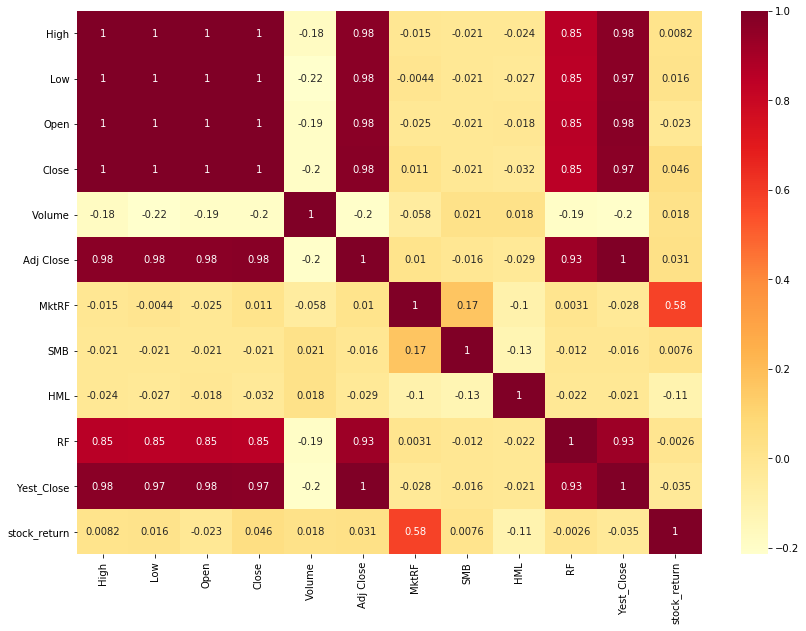

In [60]:
x = df_pfe.iloc[1:, 1:]
y = df_pfe.iloc[:, -2]
corrmat = df_pfe.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (14,10))
hm = sns.heatmap(df_pfe[top_corr_features].corr(), annot = True, cmap = "YlOrRd")